In [36]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [37]:
results = pd.read_csv('PDC24res-optimiist.csv')

results.head()

,Unnamed: 0,TP,FP,TN,FN,A,B,C,D,E,F,G,H,Precision,Fitness,F1,N,P,T
0,0,424,65,435,76,1,0,0,0,0,1,1,0,0.867076,0.848,0.857432,0.860534,0.857432,0.859003
1,1,346,116,384,154,0,0,0,0,1,1,0,0,0.748918,0.692,0.719335,0.739884,0.719335,0.730144
2,2,409,72,428,91,1,0,1,0,0,1,1,0,0.850312,0.818,0.833843,0.840039,0.833843,0.837011
3,3,393,109,391,107,0,0,1,0,1,1,0,0,0.782869,0.786,0.784431,0.783567,0.784431,0.784000
4,4,446,43,457,54,0,0,0,1,1,1,1,1,0.912065,0.892,0.901921,0.904055,0.901921,0.903001


In [38]:
# Average F1 score
results['F1'].mean()
print('Average F1 score: ', results['F1'].mean())
# Average precision
results['Precision'].mean()
print('Average precision: ', results['Precision'].mean())
# Average Fitness
results['Fitness'].mean()
print('Average Fitness: ', results['Fitness'].mean())

Average F1 score:  0.8628427655263174
Average precision:  0.8735628866885744
Average Fitness:  0.852826388888889


In [39]:
# Rename the columns
results.rename(columns={
  'Unnamed: 0': 'Index',
  'TP': 'True Positives',
  'FP': 'False Positives',
  'TN': 'True Negatives',
  'FN': 'False Negatives',
  'A': 'Dependent Tasks',
  'B': 'Loops',
  'C': 'OR Constructs',
  'D': 'Routing Constructs',
  'E': 'Optional Tasks',
  'F': 'Noise',
  'G': 'Duplicate Tasks',
  'H': 'Pre-labeled',
}, inplace=True)

print(results)

     Index  True Positives  False Positives  True Negatives  False Negatives  \
0        0             424               65             435               76   
1        1             346              116             384              154   
2        2             409               72             428               91   
3        3             393              109             391              107   
4        4             446               43             457               54   
..     ...             ...              ...             ...              ...   
283    283             472               15             485               28   
284    284             411               91             409               89   
285    285             500                0             500                0   
286    286             416               63             437               84   
287    287             493                9             491                7   

     Dependent Tasks  Loops  OR Constru

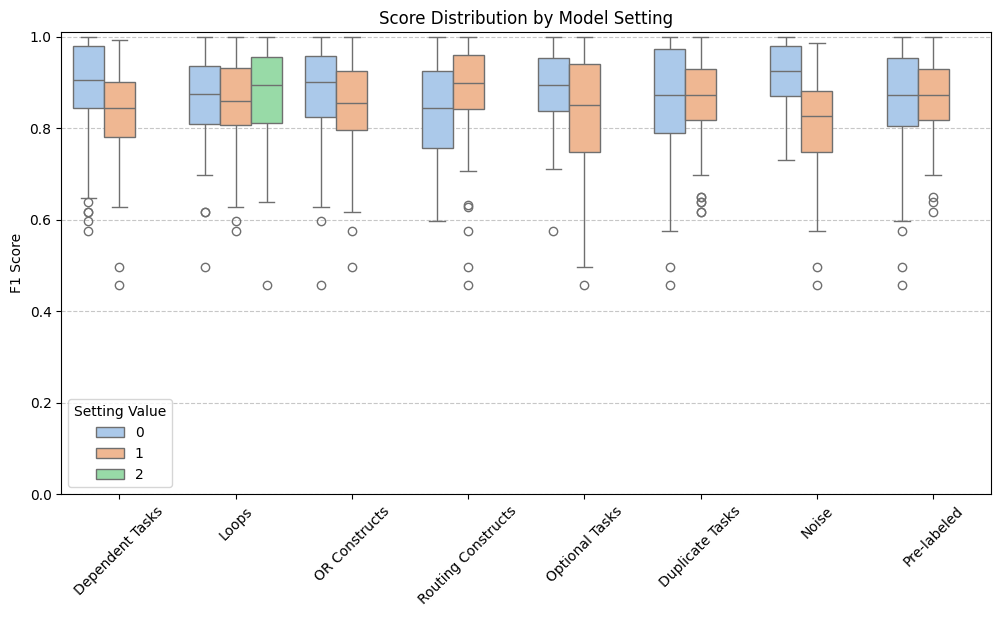

In [40]:
settings = ['Dependent Tasks','Loops','OR Constructs','Routing Constructs','Optional Tasks','Duplicate Tasks','Noise','Pre-labeled',]

# Melt the DataFrame so we can plot based on different settings
df_melted = results.melt(id_vars=['F1'], value_vars=settings, var_name="Setting", value_name="Value")

# Create the boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(x="Setting", y="F1", hue="Value", data=df_melted, palette="pastel")

# Overlay the average values using pointplot
# sns.pointplot(x="Setting", y="F1", hue="Value", data=df_melted, dodge=0.5, linestyle='none', markers="x", palette='dark:red', errorbar=None)

# Improve aesthetics
plt.xlabel("")
plt.ylabel("F1 Score")
plt.title("Score Distribution by Model Setting")
plt.legend(title="Setting Value")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.ylim(0, 1.01)
plt.xticks(rotation=45)  # Angle the x-axis labels

# Show the plot
plt.show()